PROBLEM: Employee satisfaction bisa berpengaruh terhadap kinerja kerja dan akan berdampak terhadap KPI dalam perusahaan
oleh karena itu, dalam project ini, saya ingin melihat apa saja yang dapat dilakukan oleh HR dalam hiring agar kecenderungan staff yang akan direkrut adalah staff yang akan memiliki tingkat kepuasan kerja tinggi di dalam perusahaan tersebut

PROJECT: project ini akan dilakukan untuk memprediksi faktor apa saja yang membuat seorang staff puas bekerja di perusahaan tsb.

Python Packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

SciKit Learn Package

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score, classification_report, confusion_matrix, recall_score, log_loss, roc_auc_score, auc, roc_curve
auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

XGBOOST Package

In [59]:
from xgboost import XGBClassifier, XGBRegressor

In [60]:
df = pd.read_csv('converted.csv',index_col=0)

In [61]:
df

,age,Dept,location,education,job_level,rating,onsite,awards,certifications,satisfied
0,28,0,0,1,5,2,0,1,0,1
1,50,1,0,1,3,5,1,2,1,0
2,43,1,0,0,4,1,0,2,0,0
3,44,2,1,1,2,3,1,0,0,1
4,33,0,1,0,2,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
495,49,0,0,1,2,5,0,6,0,1
496,24,1,0,0,2,4,0,2,0,0
497,34,4,1,1,1,3,0,2,0,1
498,26,1,1,0,2,1,1,1,1,0


In [62]:
X = df.drop(columns='satisfied')
y = df.satisfied

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size=.2,random_state=42)

dari 500 data, 400 digunakan untuk training data, sedangkan 100 akan digunakan untuk test data

In [64]:
X_train.shape

(400, 9)

In [65]:
X_test.shape

(100, 9)

Modelling #1, Logistic Regression

In [66]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [68]:
y_predict = model.predict(X_test)

melihat dari Accuracy dan Recall Score, angka sudah diatas 0.5, namun menurut saya masih bisa di tune sehingga accuracy dan recall score lebih baik

In [69]:
accuracy_score(y_test,y_predict)

0.47

In [70]:
recall_score(y_test,y_predict)

0.6415094339622641

Confusion Matrix

In [71]:
cm =confusion_matrix(y_test,y_predict,labels=[1,0])

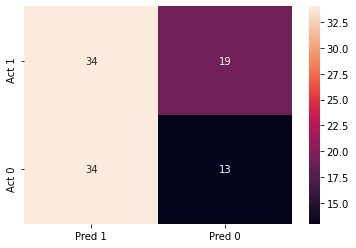

In [72]:
df = pd.DataFrame(cm,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(df,annot=True)

confusion matrix diatas, model ini banyak 'salah prediksi' dimana Actual tidak puas diprediksi puas, sedangkan actual tidak puas, di predict puas.
tingginya angka false positive dan false negative cukup tinggi sehingga data perlu di tuning

In [73]:
y_pred=model.predict(X_test)

In [74]:
probs = model.predict_proba(X_test)

In [75]:
log_loss(y_test,probs)

0.7005116464151329

In [76]:
roc_auc_score(y_test,y_pred)

0.45905258932155757

In [77]:
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test,preds)

In [78]:
sc = auc(fpr,tpr)

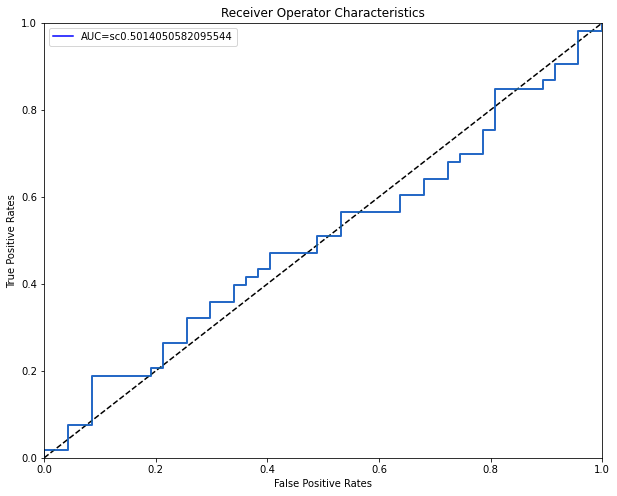

In [79]:
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristics')
plt.plot(fpr,tpr,'b',label=f'AUC=sc{sc}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rates')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.ylabel('True Positive Rates')
plt.plot(fpr,tpr)

melihat data grafik diatas, maka model yang telah saya buat masih merupakan model "coin toss", dimana probabilitanyna 50:50 dan tidak dapat diterima untuk machine leaerning..

Modelling #2, KNNeigbours Classifier

pada model KNN, saya coba untuk mencari train neighbours terbaik dengan menggunakan for loop

In [80]:
model1 = KNeighborsClassifier(weights='distance',n_neighbors=3)
model1.fit(X_train,y_train)
y_predKNN = model1.predict(X_test)

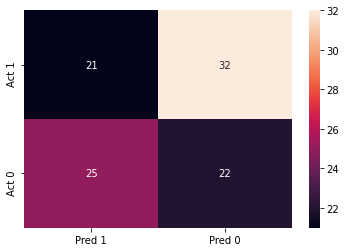

In [81]:
cm=confusion_matrix(y_test,y_predKNN,labels=[1,0])
df = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df,annot=True)

In [82]:
train_score = []
test_score = []
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

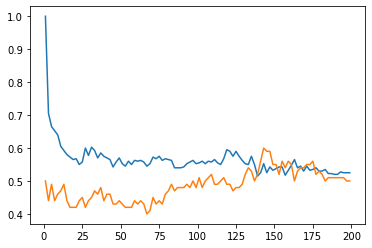

In [83]:
plt.plot(range(1,200,2),train_score, label='Train')
plt.plot(range(1,200,2),test_score, label='Test')

In [117]:
k1 = []
for i in range(1,200,2):
    k1.append(i)
k1[np.argmax(test_score)]

143

In [118]:
model1 = KNeighborsClassifier(weights='distance',n_neighbors=143)
model1.fit(X_train,y_train)
y_predKNN = model1.predict(X_test)

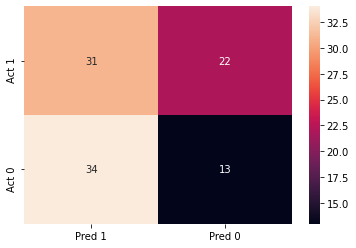

In [119]:
cm=confusion_matrix(y_test,y_predKNN,labels=[1,0])
df = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df,annot=True)

In [84]:
train_score

[1.0,
 0.705,
 0.665,
 0.6525,
 0.64,
 0.605,
 0.5925,
 0.58,
 0.5725,
 0.565,
 0.5675,
 0.55,
 0.5575,
 0.6,
 0.5775,
 0.6025,
 0.5925,
 0.57,
 0.585,
 0.575,
 0.57,
 0.565,
 0.5425,
 0.5575,
 0.57,
 0.5525,
 0.545,
 0.56,
 0.55,
 0.5625,
 0.56,
 0.5625,
 0.5575,
 0.545,
 0.5525,
 0.5725,
 0.5675,
 0.575,
 0.5625,
 0.5675,
 0.565,
 0.5625,
 0.54,
 0.54,
 0.54,
 0.5425,
 0.5525,
 0.5575,
 0.5625,
 0.5525,
 0.555,
 0.56,
 0.5525,
 0.56,
 0.5575,
 0.565,
 0.555,
 0.55,
 0.5675,
 0.595,
 0.59,
 0.575,
 0.59,
 0.575,
 0.5625,
 0.5525,
 0.55,
 0.575,
 0.55,
 0.515,
 0.525,
 0.5525,
 0.525,
 0.5425,
 0.5325,
 0.5375,
 0.5425,
 0.5425,
 0.5175,
 0.5325,
 0.5475,
 0.565,
 0.54,
 0.545,
 0.53,
 0.545,
 0.5325,
 0.535,
 0.54,
 0.53,
 0.53,
 0.535,
 0.5225,
 0.5225,
 0.52,
 0.52,
 0.5275,
 0.525,
 0.525,
 0.525]

In [85]:
test_score

[0.5,
 0.44,
 0.49,
 0.44,
 0.46,
 0.47,
 0.49,
 0.44,
 0.42,
 0.42,
 0.42,
 0.44,
 0.45,
 0.42,
 0.44,
 0.45,
 0.47,
 0.46,
 0.48,
 0.44,
 0.46,
 0.46,
 0.43,
 0.43,
 0.44,
 0.43,
 0.42,
 0.42,
 0.42,
 0.44,
 0.43,
 0.44,
 0.43,
 0.4,
 0.41,
 0.45,
 0.43,
 0.44,
 0.43,
 0.46,
 0.47,
 0.49,
 0.47,
 0.48,
 0.48,
 0.48,
 0.49,
 0.48,
 0.5,
 0.48,
 0.51,
 0.48,
 0.5,
 0.51,
 0.52,
 0.49,
 0.49,
 0.5,
 0.51,
 0.49,
 0.49,
 0.47,
 0.48,
 0.48,
 0.49,
 0.52,
 0.54,
 0.53,
 0.5,
 0.52,
 0.56,
 0.6,
 0.59,
 0.59,
 0.55,
 0.55,
 0.52,
 0.56,
 0.54,
 0.56,
 0.55,
 0.5,
 0.53,
 0.54,
 0.54,
 0.55,
 0.55,
 0.56,
 0.52,
 0.53,
 0.52,
 0.5,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.51,
 0.5,
 0.5]

dari data diatas, sepertinya Train Score ada yang mencapai 1, lalu drop hingga 0.76.
sedangkan Test Score tidak ada yang mencapai 0.6

Modelling #3, KNNeigbours Classifier + Standard Scaler

In [86]:
stdscaler = StandardScaler()
X_train_std = stdscaler.fit_transform(X_train)
X_test_std=stdscaler.fit_transform(X_test)

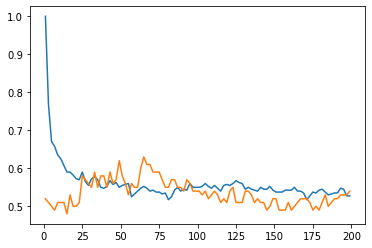

In [87]:
train_scores = []
test_scores = []
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    train_scores.append(knn.score(X_train_std,y_train))
    test_scores.append(knn.score(X_test_std,y_test))
plt.plot(range(1,200,2),train_scores, label='Train')
plt.plot(range(1,200,2),test_scores, label='Test')

In [88]:
k1 = []
for i in range(1,200,2):
    k1.append(i)
k1[np.argmax(test_scores)]

65

In [100]:
model2 = KNeighborsClassifier(weights='distance',n_neighbors=65, )
model2.fit(X_train_std,y_train)
y_predKNN_std = model2.predict(X_test_std)

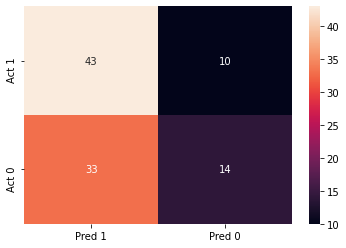

In [101]:
cm1=confusion_matrix(y_test,y_predKNN_std,labels=[1,0])
df = pd.DataFrame(cm1, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df,annot=True)

dari data diatas, sepertinya tidak lebih baik dari Logistic Regression

Modelling #4, KNNeigbours Classifier + Min Max Scaler

In [91]:
MinMaxScaler = MinMaxScaler()
X_train_min = MinMaxScaler.fit_transform(X_train)
X_test_min=MinMaxScaler.fit_transform(X_test)

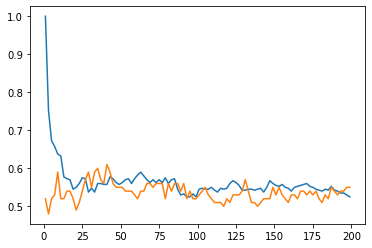

In [92]:
train_scorem = []
test_scorem = []
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_min,y_train)
    train_scorem.append(knn.score(X_train_min,y_train))
    test_scorem.append(knn.score(X_test_min,y_test))
plt.plot(range(1,200,2),train_scorem, label='Train')
plt.plot(range(1,200,2),test_scorem, label='Test')

In [93]:
k1 = []
for i in range(1,200,2):
    k1.append(i)
k1[np.argmax(test_scorem)]

41

In [115]:
model3 = KNeighborsClassifier(weights='distance',n_neighbors=41)
model3.fit(X_train_min,y_train)
y_predKNN_min = model3.predict(X_test_min)

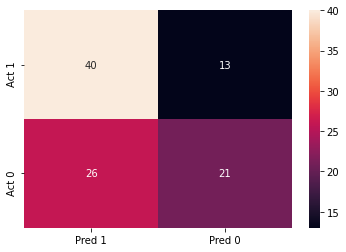

In [116]:
cm2=confusion_matrix(y_test,y_predKNN_min,labels=[1,0])
df = pd.DataFrame(cm2, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df,annot=True)

lagi-lagi, hasil diatas tidak lebih baik dari Logistic Regression

Modelling #4, KNNeigbours Classifier + Robust Scaler

In [96]:
scaler = RobustScaler()
X_train_rob = scaler.fit_transform(X_train)
X_test_rob=scaler.fit_transform(X_test)

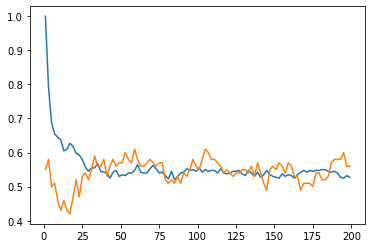

In [97]:
train_scorer = []
test_scorer = []
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rob,y_train)
    train_scorer.append(knn.score(X_train_rob,y_train))
    test_scorer.append(knn.score(X_test_rob,y_test))
plt.plot(range(1,200,2),train_scorer, label='Train')
plt.plot(range(1,200,2),test_scorer, label='Test')

dari data diatas, robust scaler adalah model terburuk diantar 3 sebelumnya

sebelum menentukan pilihan diatara model diatas, saya akan mencoba Decision Tree dan Random Forest dengan GridSearchCV.. dengan harapan hasilnya lebih baik dari diatas

In [98]:
params = {
    'n_neighbors':range(1,200,2),
    'weights': ['uniform','distance'],
    'p':[2,1]
}
modelx = GridSearchCV(KNeighborsClassifier(),params,cv=5,verbose=1)

In [99]:
modelx.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200, 2), 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [102]:
modelx.best_score_

0.5525

In [103]:
modelx.best_params_

{'n_neighbors': 121, 'p': 2, 'weights': 'uniform'}

In [104]:
modelxDT = DecisionTreeClassifier()
modelxRF = RandomForestClassifier()

Modelling #5, GridsearchCV + RandomForest

In [105]:
modelxRF.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
y_rf = modelxRF.predict(X_test)

In [107]:
print(classification_report(y_test,y_rf))

precision    recall  f1-score   support

           0       0.48      0.53      0.51        47
           1       0.54      0.49      0.51        53

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



Modedlling #6 GridsearchCV + Decision Tree

In [108]:
modelxDT.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
y_dt = modelxDT.predict(X_test)

In [110]:
print(classification_report(y_test,y_dt))

precision    recall  f1-score   support

           0       0.55      0.47      0.51        47
           1       0.58      0.66      0.62        53

    accuracy                           0.57       100
   macro avg       0.57      0.56      0.56       100
weighted avg       0.57      0.57      0.57       100



ternyata semua model diatas tidak ada yang lebih baik..

In [111]:
modelXGBoost = XGBClassifier()
modelXGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
y_predxgb = modelXGBoost.predict(X_test)
y_trainxgb  =modelXGBoost.predict(X_train)

In [113]:
print(classification_report(y_train, y_trainxgb))

precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       210

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [114]:
print(classification_report(y_test, y_predxgb))

precision    recall  f1-score   support

           0       0.48      0.45      0.46        47
           1       0.54      0.57      0.55        53

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100

